In [1]:
import torch
from diffusers.models.embeddings import TimestepEmbedding

@torch.no_grad()
def get_class_embedding(device='cuda'):
    geo_class = torch.tensor([[0, 0, 1], [0, 1, 0], [0, 0, 1]], device=device, dtype=torch.float32)
    projection_class_embeddings_input_dim = 3
    time_embed_dim = 1280
    class_embedding = TimestepEmbedding(projection_class_embeddings_input_dim, time_embed_dim).to(device)
    class_emb = class_embedding(geo_class)
    return class_emb

class_emb = get_class_embedding()
from jhutil import color_log; color_log(1111, class_emb)

 1111  "tensor[3, 1280] n=3840 (15Kb) x∈[-0.474, 0.473] μ=-0.002 σ=0.139 cuda:0"


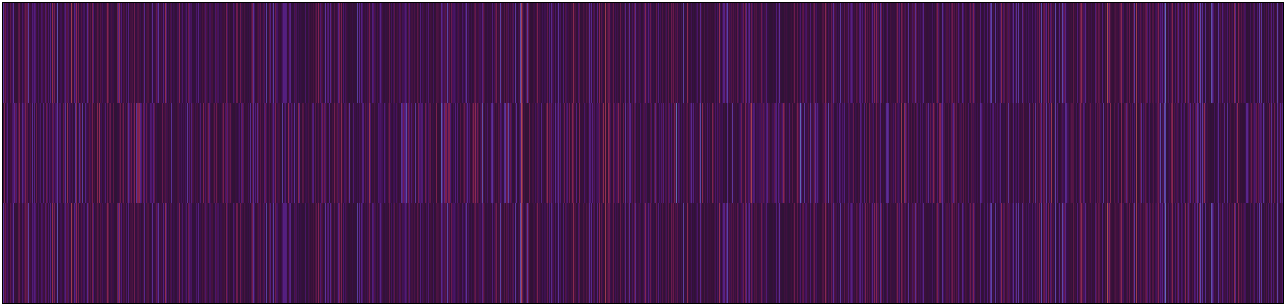

In [7]:
torch.concat([class_emb[0].repeat(100, 1), 
              class_emb[1].repeat(100, 1), 
              class_emb[2].repeat(100, 1)]).chans